### Import Packages

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

C:\Users\marys\AppData\Local\Temp\ipykernel_14412\2967179035.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


#### Pfade definieren

In [2]:
#Aktueller Pfad (current path)
cur_path = os.getcwd()
pics_path=os.path.join(cur_path,"Bildervorbearbeitung","Bilder","Auswertung","Zugeschnittene_Bilder")
xlsx_data_path=os.path.join(cur_path,"Bildervorbearbeitung","Bilder","Auswertung","xlsx")

### Daten einladen
Festlegen  der Klassen: Thereshold-array zeigt 3 verscheidene Abstufungen, innerhalb von 1,5 % engere Klassen, da bis zu 1 % die Probe/das Bauteil noch als i.O gewertet wird. Danach etwas weiterer Abstufungen. Ab 10 % Abstufungen von 10 %, da hier das Bauteil schon sehr porös ist und zusätzlich solche Trainingsdaten im bisherigen Trainingsdatensatz nicht existieren. 

enumerate heißt es zählt über das Array nacheinander drüber. 0.01 entspricht der Klasse 1, 0.02 entspricht der Klasse 2 ect. 
Start=1 heißt, dass es bei Klasse 1 beginnen soll. 

Schließlich wird eine neue Liste abgespeichert

In [3]:
df_path = os.path.join(xlsx_data_path, "Porositaet_Zugeschnittene_Bilde.xlsx")
df_pre = pd.read_excel(df_path)

In [4]:
import numpy as np

theresholds_narrow = np.arange(0.01, 1.5, 0.01)
thereshold_middle = np.arange(1.5,10.5,0.5)
thereshold_wide = np.arange(20,110,10)
theresholds = np.concatenate((theresholds_narrow, thereshold_middle, thereshold_wide))
print(theresholds)
print("Anzahl der Klassen:", len(theresholds))


def get_class(porosity, thresholds):
    for i, threshold in enumerate(thresholds, start=1):
        if porosity <= threshold:
            return i
    return len(thresholds)

df_pre['Klassen'] = df_pre['Porositaet'].apply(lambda x: get_class(x, theresholds))

# Speichern der Ergebnisse in einer neuen Liste
new_xlsx_path = os.path.join(xlsx_data_path, 'Porositaet_Zugeschnittene_Bilder_mit_Klassen.xlsx')
df_pre.to_excel(new_xlsx_path, index=False)


[1.00e-02 2.00e-02 3.00e-02 4.00e-02 5.00e-02 6.00e-02 7.00e-02 8.00e-02
 9.00e-02 1.00e-01 1.10e-01 1.20e-01 1.30e-01 1.40e-01 1.50e-01 1.60e-01
 1.70e-01 1.80e-01 1.90e-01 2.00e-01 2.10e-01 2.20e-01 2.30e-01 2.40e-01
 2.50e-01 2.60e-01 2.70e-01 2.80e-01 2.90e-01 3.00e-01 3.10e-01 3.20e-01
 3.30e-01 3.40e-01 3.50e-01 3.60e-01 3.70e-01 3.80e-01 3.90e-01 4.00e-01
 4.10e-01 4.20e-01 4.30e-01 4.40e-01 4.50e-01 4.60e-01 4.70e-01 4.80e-01
 4.90e-01 5.00e-01 5.10e-01 5.20e-01 5.30e-01 5.40e-01 5.50e-01 5.60e-01
 5.70e-01 5.80e-01 5.90e-01 6.00e-01 6.10e-01 6.20e-01 6.30e-01 6.40e-01
 6.50e-01 6.60e-01 6.70e-01 6.80e-01 6.90e-01 7.00e-01 7.10e-01 7.20e-01
 7.30e-01 7.40e-01 7.50e-01 7.60e-01 7.70e-01 7.80e-01 7.90e-01 8.00e-01
 8.10e-01 8.20e-01 8.30e-01 8.40e-01 8.50e-01 8.60e-01 8.70e-01 8.80e-01
 8.90e-01 9.00e-01 9.10e-01 9.20e-01 9.30e-01 9.40e-01 9.50e-01 9.60e-01
 9.70e-01 9.80e-01 9.90e-01 1.00e+00 1.01e+00 1.02e+00 1.03e+00 1.04e+00
 1.05e+00 1.06e+00 1.07e+00 1.08e+00 1.09e+00 1.10e

In [5]:
df_path = new_xlsx_path
df = pd.read_excel(df_path)
df.head()

,Bildname,Porositaet,Klassen
0,P_006_quad_Winkel_180_crp_x10_y10_Winkel_180.png,0.4636,47
1,P_006_quad_Winkel_180_crp_x10_y10_Winkel_270.png,0.2652,27
2,P_006_quad_Winkel_180_crp_x10_y10_Winkel_360.png,0.0652,7
3,P_006_quad_Winkel_180_crp_x10_y10_Winkel_90.png,0.2640,27
4,P_006_quad_Winkel_180_crp_x10_y11_Winkel_180.png,0.4188,42


#### Umwandeln von Bildern und Werten aus der Liste in ein Array

In [8]:
X_resized = 350
Y_resized = 350

X = []
y = [] 

import_data = pd.read_excel(df_path)
for index, row in import_data.iterrows():
    img_name = row['Bildname']
    img_path = os.path.join(pics_path, img_name)
    img_rgb = cv2.imread(img_path)
    img_grey = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img_grey, (X_resized, Y_resized))
    X.append(img)
    y.append(row['Klassen'])

print("Anzahl der Datenpaare:",len(y))

X = np.array(X)
y = np.array(y)

Anzahl der Datenpaare: 1456


#### Train-Test-Split

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, normalize
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

y_train_cat = to_categorical(y_train, num_classes=176)
y_test_cat = to_categorical(y_test, num_classes=176)
print(y_test_cat)
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[[ 51 236 235 ... 242 241 242]
  [ 51 235 236 ... 241 241 241]
  [ 50 234 235 ... 241 240 239]
  ...
  [ 50 234 234 ... 242 242 242]
  [ 50 235 236 ... 240 240 241]
  [ 50 234 234 ... 241 240 240]]

 [[ 50  51  50 ...  51  52  51]
  [235 236 235 ... 240 240 239]
  [235 237 237 ... 241 240 239]
  ...
  [236 237 236 ... 236 237 239]
  [235 235 235 ... 237 237 239]
  [237 235 236 ... 237 238 239]]

 [[ 50 236 238 ... 240 238 239]
  [ 50 236 239 ... 239 239 240]
  [ 51 237 238 ... 241 240 239]
  ...
  [ 50 234 236 ... 241 240 239]
  [ 50 234 235 ... 240 240 239]
  [ 50 235 234 ... 241 241 239]]

 ...

 [[242 241 240 ... 241 241 241]
  [241 242 243 ... 239 240 240]
  [240 240 241 ... 239 239 239]
  ...
  [227 229 230 ... 233 233 233]
  [231 230 230 ... 235 234 235]
  [231 231 231 ... 235 234 234]]

 [[ 50  50  50 ...  50  50  49]
  [232

Eingangsdaten Bild: Pixelgröße und Eingangsfarbkanäle (350, 350)
Porosität [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


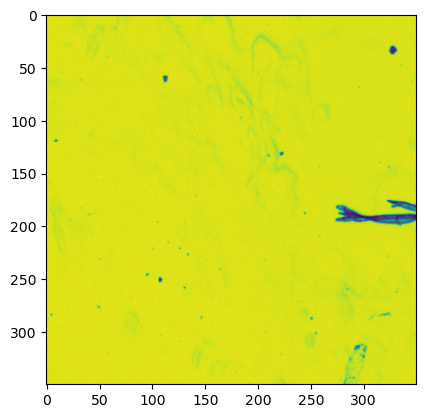

In [13]:
plt.imshow(X_train[1078])
plt.show

print("Eingangsdaten Bild: Pixelgröße und Eingangsfarbkanäle", X_train[1000].shape)
print("Porosität",y_train_cat[1078])

### Modell erstellen

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D, Reshape
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.optimizers import SGD, RMSprop
from numpy import reshape

model = Sequential()

# model.add(Lambda(standardize, input_shape=(28, 28, 1)))

# model.add(Reshape((500, 500, 3), input_shape=(None, 500, 500, 3)))

model.add(Conv2D(filters=12, kernel_size=(3, 3), activation="relu", input_shape=(X_resized, Y_resized, 1)))
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=24, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(filters=24, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=48, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(200, activation="relu"))
model.add(Dense(176, activation="softmax"))  # 176 verschiedene Klassen (siehe oben)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 348, 348, 12)      120       
                                                                 
 conv2d_6 (Conv2D)           (None, 346, 346, 12)      1308      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 173, 173, 12)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 173, 173, 12)      48        
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 171, 171, 24)      2616      
                                                                 
 conv2d_8 (Conv2D)           (None, 169, 169, 24)     

#### Modell kompalieren

In [16]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(
    X_train,
    y_train_cat,
    epochs = 5,
    batch_size = 32
)

Epoch 1/5



35/35 [==============================] - 36s 988ms/step - loss: 6.6732 - accuracy: 0.0751
Epoch 2/5
35/35 [==============================] - 34s 966ms/step - loss: 3.6918 - accuracy: 0.1951
Epoch 3/5
35/35 [==============================] - 33s 950ms/step - loss: 2.5074 - accuracy: 0.4560
Epoch 4/5
35/35 [==============================] - 34s 971ms/step - loss: 1.4972 - accuracy: 0.6639
Epoch 5/5
35/35 [==============================] - 38s 1s/step - loss: 1.1398 - accuracy: 0.7500


In [18]:
model.evaluate(X_test,y_test_cat)

12/12 [==============================] - 4s 286ms/step - loss: 25.1931 - accuracy: 0.0357


[25.193063735961914, 0.0357142873108387]